## Mount the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import the libraries

In [2]:
import os
import scipy.io
import matplotlib
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import clear_output

In [3]:
pwd

'/content'

## Load the Learning Set

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/Learning_Set/Bearing1_1/acc_00001.csv', header=None, sep=',')
data

,0,1,2,3,4,5
0,9,39,39,65664.0,0.552,-0.146
1,9,39,39,65703.0,0.501,-0.480
2,9,39,39,65742.0,0.138,0.435
3,9,39,39,65781.0,-0.423,0.240
4,9,39,39,65820.0,-0.802,0.020
...,...,...,...,...,...,...
2555,9,39,39,165470.0,0.044,-0.094
2556,9,39,39,165510.0,-0.456,0.486
2557,9,39,39,165550.0,-0.885,-0.154
2558,9,39,39,165580.0,-0.230,-0.762


In [5]:
data=data.rename(columns={0:"Hours" , 1: "Minutes", 2:"Seconds", 3:"Micro_seconds",4:"Horizontal_Acceleration",5:"Vertical_Acceleration"})
data

,Hours,Minutes,Seconds,Micro_seconds,Horizontal_Acceleration,Vertical_Acceleration
0,9,39,39,65664.0,0.552,-0.146
1,9,39,39,65703.0,0.501,-0.480
2,9,39,39,65742.0,0.138,0.435
3,9,39,39,65781.0,-0.423,0.240
4,9,39,39,65820.0,-0.802,0.020
...,...,...,...,...,...,...
2555,9,39,39,165470.0,0.044,-0.094
2556,9,39,39,165510.0,-0.456,0.486
2557,9,39,39,165550.0,-0.885,-0.154
2558,9,39,39,165580.0,-0.230,-0.762


# Visualization

## Plotting the vibration signals with respect to horizontal acceleration and vertical acceleration

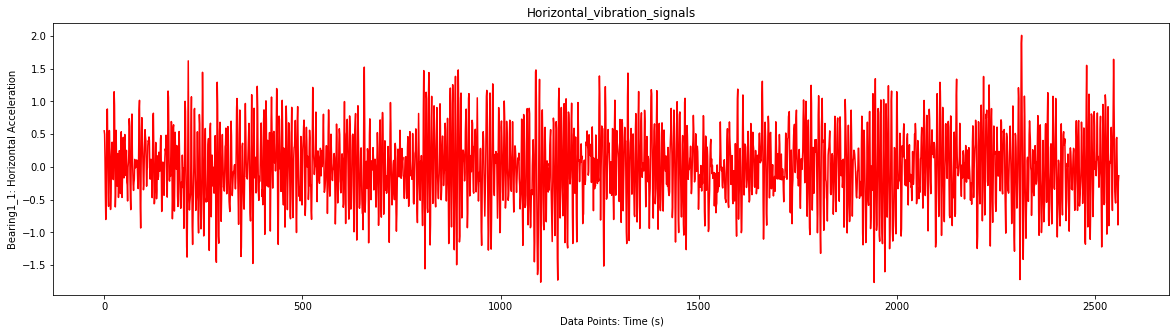

In [6]:
plt.figure(figsize=(20,5))
plt.plot(data.iloc[:,-2], color='red')
plt.xlabel('Data Points: Time (s)')
plt.ylabel('Bearing1_1: Horizontal Acceleration')
plt.title('Horizontal_vibration_signals')
plt.show()

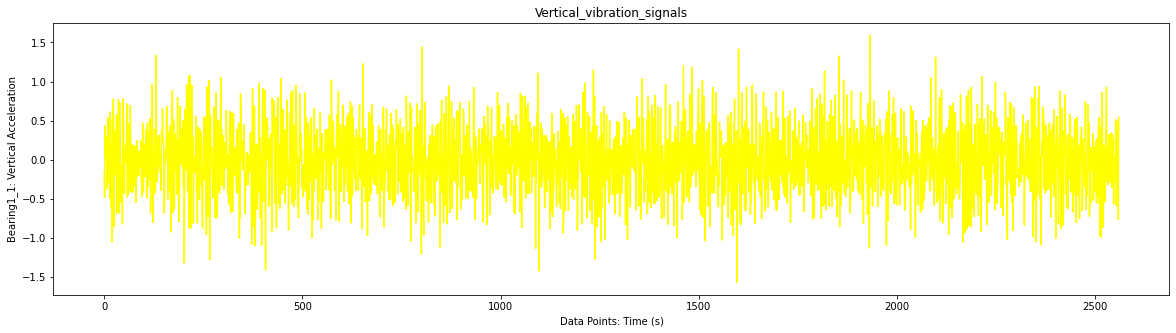

In [7]:
plt.figure(figsize=(20,5))
plt.plot(data.iloc[:,-1],color='yellow')
plt.xlabel('Data Points: Time (s)')
plt.ylabel('Bearing1_1: Vertical Acceleration')
plt.title('Vertical_vibration_signals')
plt.show()

## Function to get acceleration tables in the bearings data

In [ ]:
def get_acceleration_bearings_data(folder):
    names = os.listdir(folder)
    is_acc = ['acc' in name for name in names] # To get only acceleration tables
    # print(is_acc)
    names = names[:sum(is_acc)]
    # print(names)
    files = [os.path.join(folder,f) for f in names]
    print(pd.read_csv(files[0],header=None).shape)
    sep = ';' if pd.read_csv(files[0],header=None).shape[-1]==1 else ','
    h = [pd.read_csv(f,header=None,sep=sep).iloc[:,-2] for f in files]
    v = [pd.read_csv(f,header=None,sep=sep).iloc[:,-1] for f in files]
    H = np.concatenate(h)
    V = np.concatenate(v)
    print("Horizontal Signal = ", H)
    print("Vertical Signal = ", V)

    print("Horizontal shape = ", H.shape," and  Vertical Shape = ", V.shape)
    return np.stack([H,V],axis=-1)

# print("Details of Bearing 1_1")
data = get_acceleration_bearings_data('/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/Learning_Set/Bearing1_1')
# print("Details of Bearing 1_4")
data = get_acceleration_bearings_data('/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/Full_Test_Set/Bearing1_4')
print("Data Shape = " ,data.shape)

(2560, 6)
Horizontal Signal =  [ 0.688  0.689  1.145 ...  0.259  0.123 -0.171]
Vertical Signal =  [ 0.302  0.07  -0.078 ...  0.547  0.329 -0.107]
Horizontal shape =  (6262237,)  and  Vertical Shape =  (6262237,)
(2560, 1)
Horizontal Signal =  [-0.531  0.552 -0.128 ...  0.171 -0.001  0.562]
Vertical Signal =  [-1.475  0.602  0.573 ... -0.788  0.511 -0.095]
Horizontal shape =  (3190587,)  and  Vertical Shape =  (3190587,)
Data Shape =  (3190587, 2)


# Visualization

## 1) Plotting of Horizontal Vibration Signals

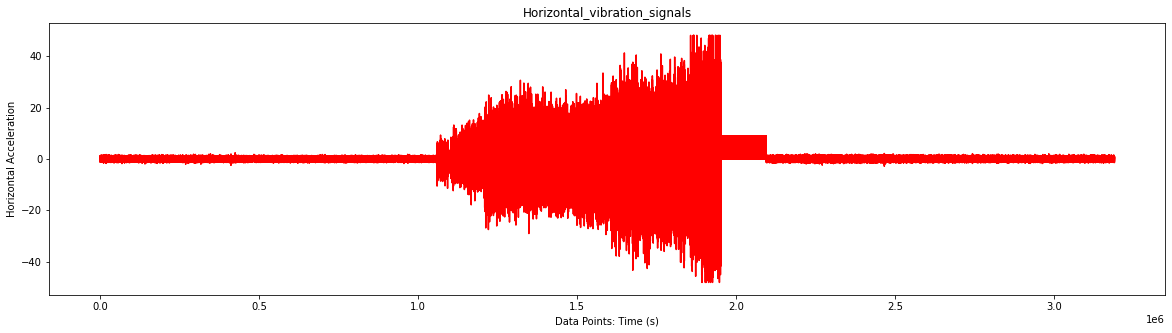

In [ ]:
plt.figure(figsize=(20,5))
# plt.subplot(121)
plt.plot(data[:,0],color='red')
plt.xlabel('Data Points: Time (s)')
plt.ylabel('Horizontal Acceleration')
plt.title('Horizontal_vibration_signals')
# plt.subplot(122)

plt.show()

## 2) Plotting of Vertical Vibration Signals

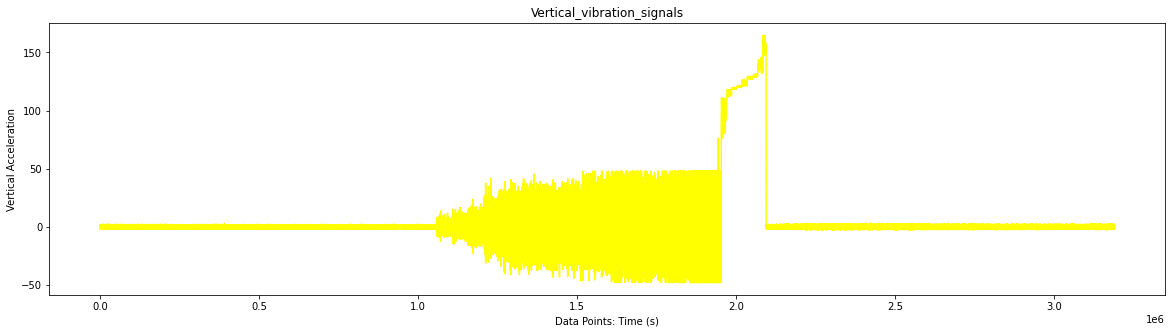

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(data[:,1],color='yellow')
plt.xlabel('Data Points: Time (s)')
plt.ylabel('Vertical Acceleration')
plt.title('Vertical_vibration_signals')
plt.show()

In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset

/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset


## Converting the datasets into matlab tables

In [ ]:
dataset_path = '/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset'

for i in ['Learning_Set']:
    mat_path = os.path.join(dataset_path,i)
    for j in os.listdir(mat_path):
        mat_path1 = os.path.join(mat_path,j)
        print(mat_path1)
        
        # Calling the get_acceleration_bearings_data function
        data = get_acceleration_bearings_data(mat_path1)
        save_name = dataset_path + '/mat/' + j +'.mat'
        print(save_name)
        scipy.io.savemat(save_name,{'h':data[:,0], 'v':data[:,1]}) 
    print('\n')